<a href="https://colab.research.google.com/github/tushar2704/tushar2704/blob/main/Handwritten_Digit_Recognition_on_MNIST_dataset(draft).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRCP-1002-Handwritten Digits Recognition

Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.
Task 2:- Classify a given image of a handwritten digit into one of the 10 classes
representing integer values from 0 to 9.
Task3:- Compare between various models and find the classifier that works
better.

Dataset Link:
MNIST (&quot;Modified National Institute of Standards and Technology&quot;) is the de facto “hello
world” dataset of computer vision. Since its release in 1999, this classic dataset of
handwritten images has served as the basis for benchmarking classification algorithms.
As new machine learning techniques emerge, MNIST remains a reliable resource for
researchers and learners alike.
Your goal is to correctly identify digits from a dataset of tens of thousands of
handwritten images. We encourage you to experiment with different algorithms to learn
first-hand what works well and how techniques compare.
Practice Skills
● Computer vision fundamentals including simple neural networks
● Classification methods such as SVM and K-nearest neighbors

Link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1002-
HandwrittenDigits.zip

The input feature contains images.
Output feature contains 10 classes (digits varying from 0 to 9)

Model Comparison Report
Create a report stating the performance of multiple models on this data and
suggest the best model for production.
Report on Challenges faced
Create a report which should include challenges you faced on data and
what technique used with proper reason.

Note:-All above tasks have to be done on a single jupyter notebook and
share the same while final submission of project.

In [71]:
#Importing the required Liabraries
import numpy as np
import pandas as pd

import keras
from keras import utils as np_utils
from keras.datasets import mnist

In [72]:
#Importing the additional Liabraries
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Preprocessing the data

In [73]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [74]:
(X_train, y_train), (X_test, y_test)  =  mnist.load_data()

In [75]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# Visualizing

In [76]:
#Defining function to visualize
def image_input_plot(i):
    plt.imshow(X_train[i], cmap = 'binary')
    plt.title("X_train[i]")
    plt.show()

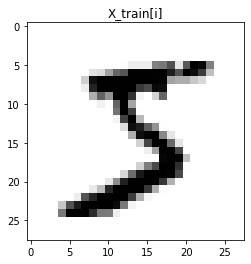

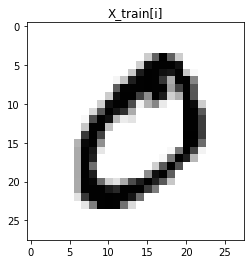

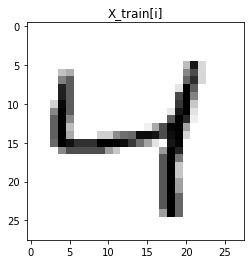

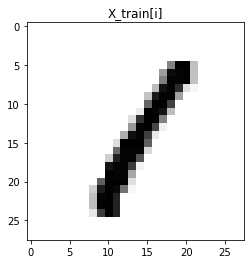

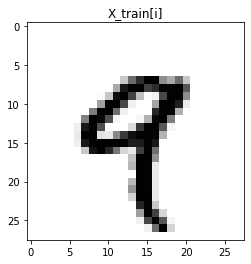

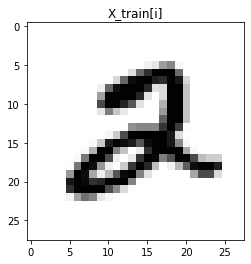

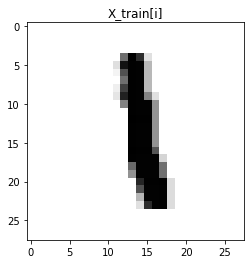

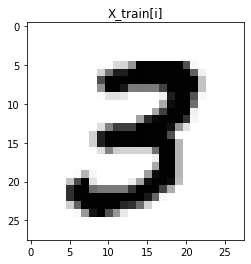

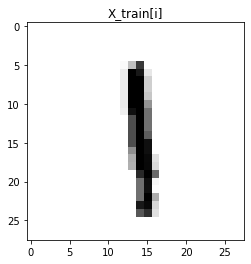

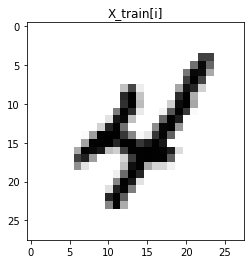

In [77]:
#printing first ten images
for i in range(10):
    image_input_plot(i)

In [78]:
#Processing the images

#Normalizing to [0,1] range

X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [79]:
#Reshaped the dimesnion of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [80]:
#One hot encoding / coverting classes

y_train = keras.utils.np_utils.to_categorical(y_train)

y_test = keras.utils.np_utils.to_categorical(y_test)



# Building the model

In [81]:
model_1 = Sequential()

#First layer
model_1.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model_1.add(MaxPool2D((2,2)))


#Second layer
model_1.add(Conv2D(64, (3,3), activation = 'relu'))
model_1.add(MaxPool2D((2,2)))

#Flattening the layer
model_1.add(Flatten())

#Dropout
model_1.add(Dropout(0.25))

#Classification layer
model_1.add(Dense(10, activation="softmax"))

In [82]:
print(model_1.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [83]:
#Compliation
model_1.compile(optimizer = 'adam', loss= keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [84]:
#Callbacks

#Earlystopping
es = EarlyStopping(monitor='val_acc', min_delta =0.01, patience=4, verbose=1 )

#Model check point

mcp = ModelCheckpoint("./bestmodel.h5", monitor='val_acc', verbose=1, save_best_only=True)


callback = [es,mcp]

# Model Training

In [85]:
his = model_1.fit(X_train , y_train , epochs = 50 , validation_split= 0.3)

Epoch 1/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.2164 - accuracy: 0.9348 - val_loss: 0.0769 - val_accuracy: 0.9767
Epoch 2/50
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0753 - accuracy: 0.9770 - val_loss: 0.0556 - val_accuracy: 0.9831
Epoch 3/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0542 - val_accuracy: 0.9833
Epoch 4/50
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0435 - val_accuracy: 0.9869
Epoch 5/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.0532 - val_accuracy: 0.9835
Epoch 6/50
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.0511 - val_accuracy: 0.9849
Epoch 7/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0283 - accuracy: 0.9904 - val_loss: 0.0385 -

In [ ]:
model_s = keras.models.load_model()